In [1]:
from spikenet.network import Network
from spikenet.image_to_spike_convertor import SpikePlotter

from spikenet.dataset.spiking_mnist import spiking_mnist

splt = SpikePlotter()

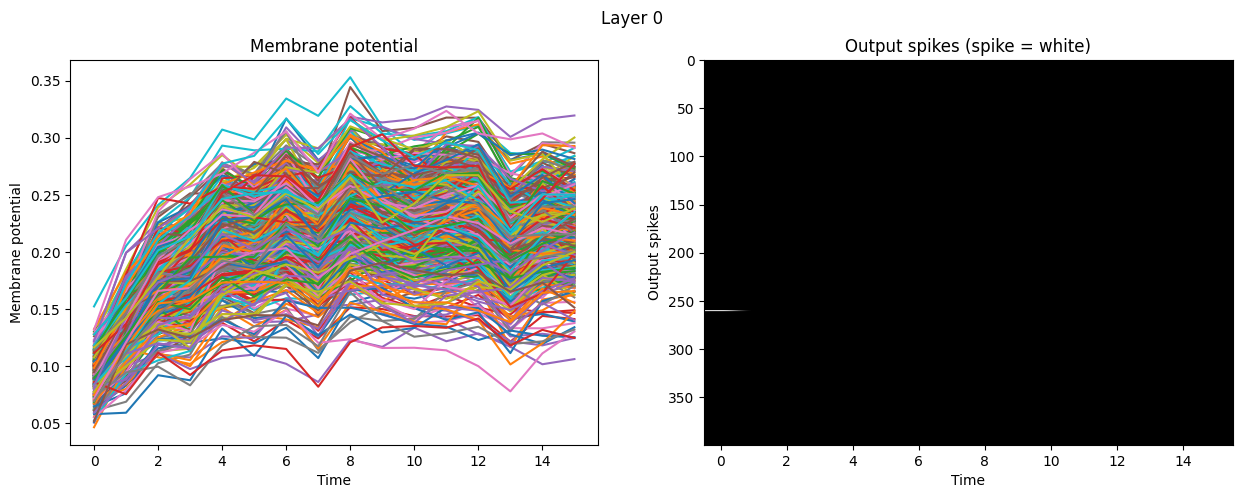

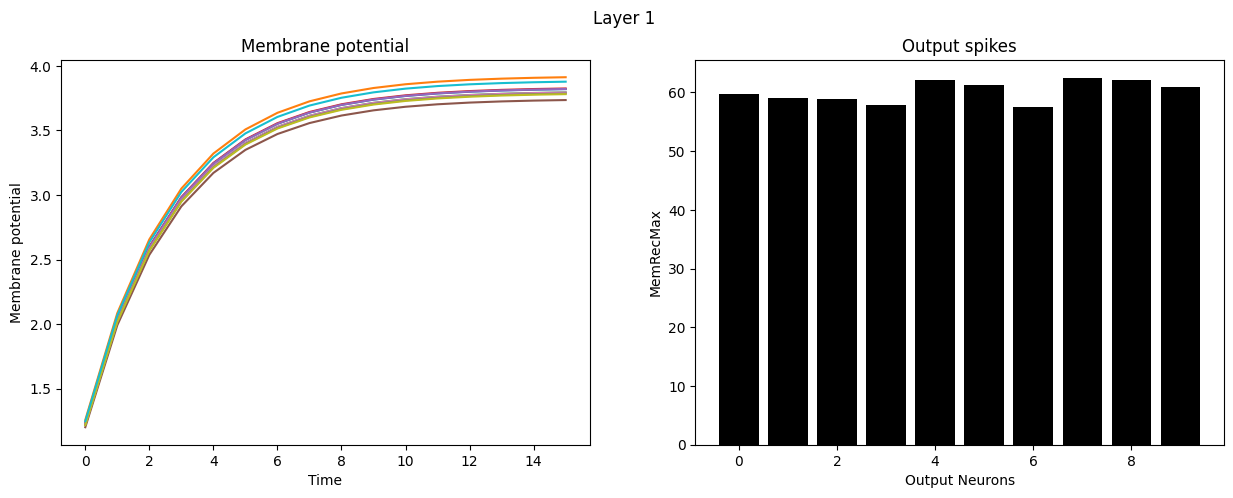

In [2]:
from spikenet.layers.spiking_base import TimeReduction
from spikenet.layers.spiking_dense import SpikingDenseLayer

data_x, data_y = spiking_mnist.sample()
net = (
    Network()
    .add_layer(SpikingDenseLayer, 400, in_features=data_x.shape[-1])
    .add_layer(SpikingDenseLayer, 10, time_reduction=TimeReduction.MemRecMax)
).build()


data_x = data_x.reshape(1, *data_x.shape)
net.forward(data_x)
net.plot_activity()

===== Training Started ======
Epoch 1 | ............................................... | Loss: 2.0252
Epoch 2 | ............................................... | Loss: 1.1817
Epoch 3 | ............................................... | Loss: 0.5356
Epoch 4 | ............................................... | Loss: 0.7317
Epoch 5 | ............................................... | Loss: 0.6405
Epoch 6 | ............................................... | Loss: 0.5627
Epoch 7 | ............................................... | Loss: 0.5303
Epoch 8 | ............................................... | Loss: 0.3636
Epoch 9 | ............................................... | Loss: 0.4962
Epoch 10 | ............................................... | Loss: 0.5266
===== Training Finished =====


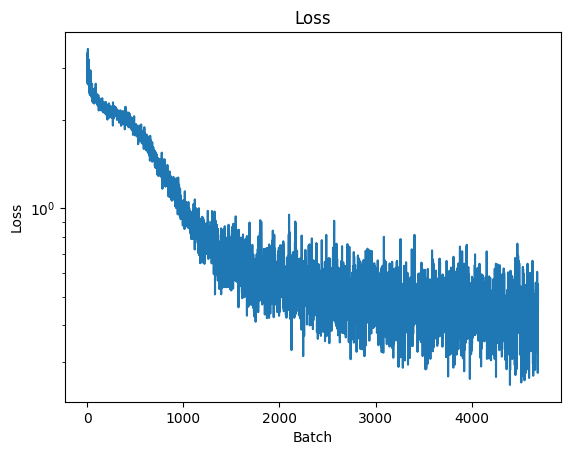

====== Testing Started ======
Accuracy: 8490/10000 = 84.90%
===== Testing Finished ======


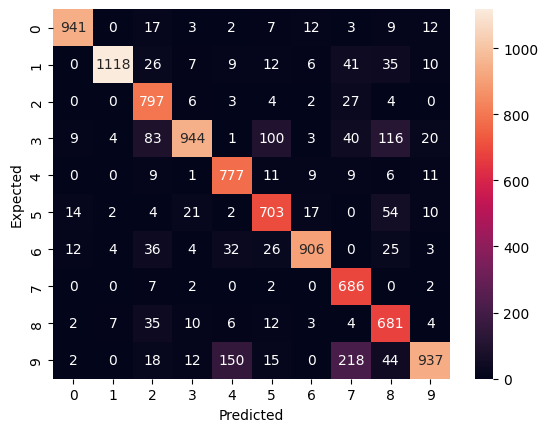

Network:
ModuleList(
  (0-1): 2 x SpikingDenseLayer()
)

In [3]:
net.fit(spiking_mnist)

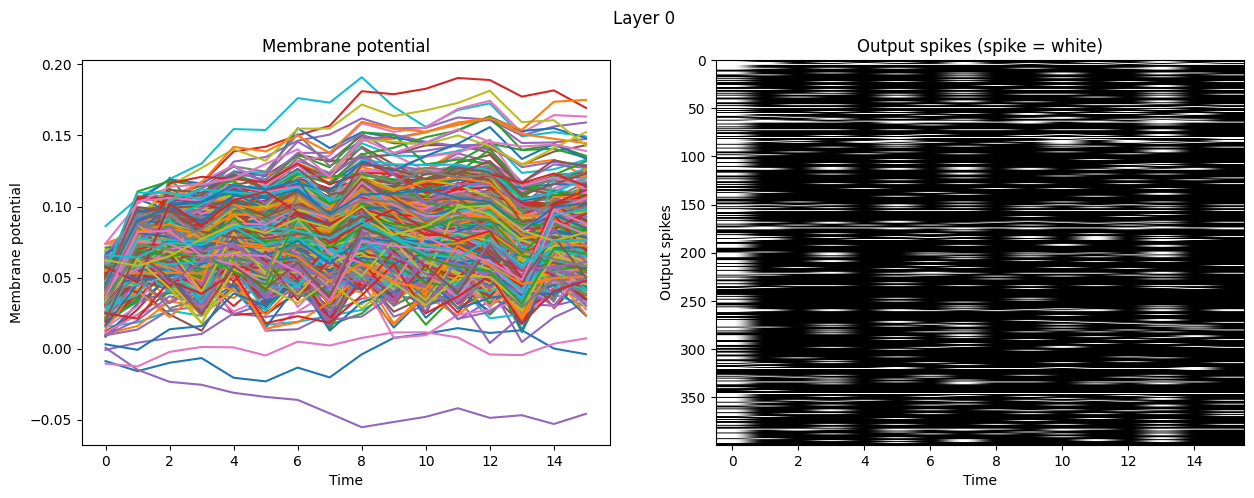

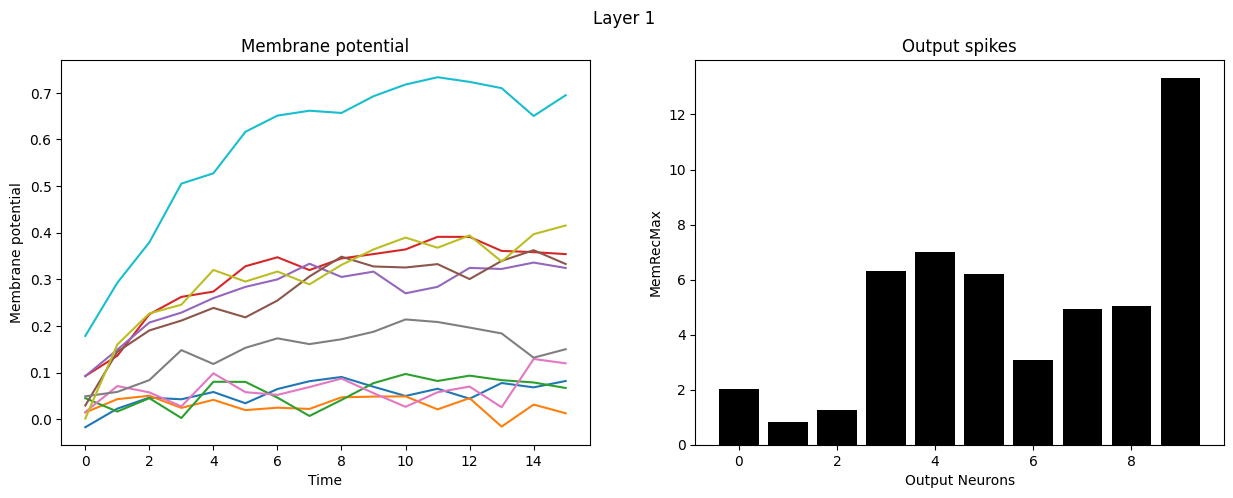

In [4]:
net.forward(data_x)
net.plot_activity()